In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("iris.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
data.drop('species',inplace = True, axis =1)

In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
data['ID'] = data.index+100

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,ID
0,5.1,3.5,1.4,0.2,100
1,4.9,3.0,1.4,0.2,101
2,4.7,3.2,1.3,0.2,102
3,4.6,3.1,1.5,0.2,103
4,5.0,3.6,1.4,0.2,104


In [9]:
feature= data.columns[:-1]

In [10]:
feature

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

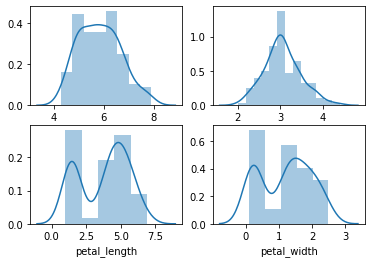

In [11]:
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(data[i[1]])

In [12]:
# I will use petal length and petal width for cluster profiling because we can see there is separation in these two

### Outlier Treatment

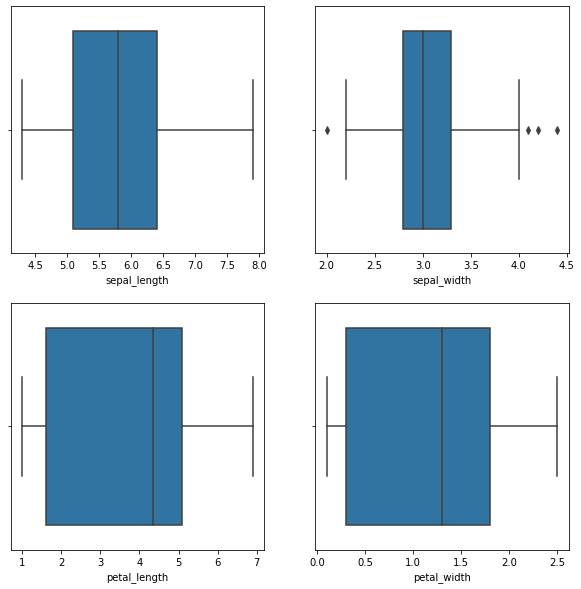

In [13]:
plt.figure(figsize = (10,10))
feature = data.columns[:-1]
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(data[i[1]])

Only Sepal width has some outliers,
but we have bery few data so outlier removal is 
not an option
We can do outlier capping, meaning
that any value which is outlier we can
make it equal to highest optimal value

In [14]:
#capping 
#1-99 soft range
q1 = data['sepal_width'].quantile(0.01)
q4 = data['sepal_width'].quantile(0.99)

data['sepal_width'][data['sepal_width']<=q1] = q1
data['sepal_width'][data['sepal_width']>=q4] = q4

## Check the hopkins score
It helps me understand that our data has good clusters or not

In [15]:
#We have above 80 value for score so we have clusters in data
# it compares our data with random data and if it is very similar to that data
# then our data is not good for clustering
# above 80 is recomended , below 50 is useless

# Clustering

choosing the value of k`
1. Silhouette score
2. Elbow curve

In [16]:
from sklearn.metrics import silhouette_score

## Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(data.drop('ID',axis =1))



In [28]:
df1 = pd.DataFrame(df1,columns = data.columns[:-1])

In [29]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.054478,-1.341272,-1.312977
1,-1.143017,-0.125943,-1.341272,-1.312977
2,-1.385353,0.346225,-1.398138,-1.312977
3,-1.506521,0.110141,-1.284407,-1.312977
4,-1.021849,1.290562,-1.341272,-1.312977


[[2, 0.5799043037099341], [3, 0.4600387728518416], [4, 0.38984833697832033], [5, 0.3476777430721242], [6, 0.33032837386395586], [7, 0.33158211940791593], [8, 0.3480300489033645], [9, 0.362496311883057], [10, 0.35625176795352276]]


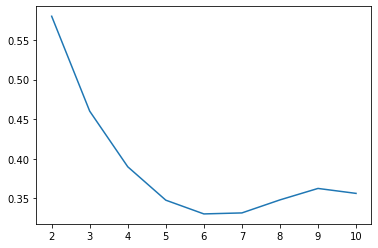

In [35]:
lis = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(df1)
    lis.append([k,silhouette_score(df1,kmeans.labels_)])
temp=pd.DataFrame(lis)
plt.plot(temp[0],temp[1])

In [32]:
# You can see that score us max at 2 and then 3
# But acc to industry 2 is not a good option
# It better to choose values greater than 2 so 
# 3 might be the better option

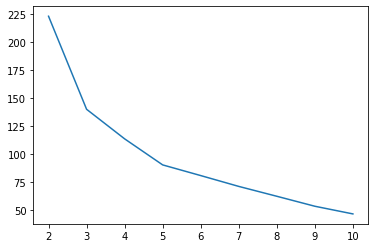

In [37]:
ssd = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(df1)
    ssd.append([k,kmeans.inertia_])
temp = pd.DataFrame(ssd)
plt.plot(temp[0],temp[1])

In [38]:
# We can see that we have a break at 3 and 5
# If we choose 5 then there would 5 KPI which would make it difficult
# to track so it is recomended to go for 3 K
# But if your business need 5 classes then we do not need 
# Silhouette or elbow curve simply use 5 as K

### We have decided k as 3 so lets perform clustering

In [47]:
kmeans = KMeans(n_clusters=3,random_state=50)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [48]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [49]:
label = pd.DataFrame(kmeans.labels_,columns = ['Label'])

In [53]:
df = pd.concat([data,label],axis =1)

In [54]:
df.Label.value_counts()

2    53
0    50
1    47
Name: Label, dtype: int64

### Plotting the cluster

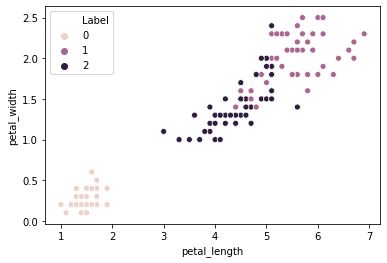

In [56]:
sns.scatterplot(x = 'petal_length',y='petal_width',hue='Label',data=df)

### Cluster Profiling
making sense of your clusters


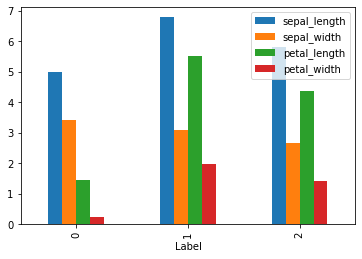

In [58]:
df.drop('ID',axis =1).groupby('Label').mean().plot(kind='bar')

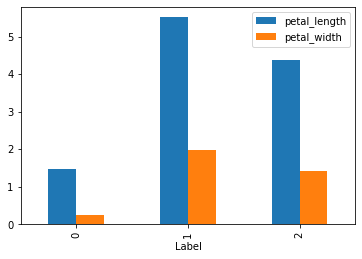

In [59]:
# From above it is not very clear which cluster is doing what 
# So we will use 2 KPI only petal widh and petal length
df.drop(['ID','sepal_length','sepal_width'],axis =1).groupby('Label').mean().plot(kind='bar')

In [60]:
# Now we can see that there is difference between each clusters 
# That is clustering profiling 


In [64]:
#Filter the cluster for 0
df[df['Label']==0]

,sepal_length,sepal_width,petal_length,petal_width,ID,Label
0,5.1,3.500,1.4,0.2,100,0
1,4.9,3.000,1.4,0.2,101,0
2,4.7,3.200,1.3,0.2,102,0
3,4.6,3.100,1.5,0.2,103,0
4,5.0,3.600,1.4,0.2,104,0
5,5.4,3.900,1.7,0.4,105,0
6,4.6,3.400,1.4,0.3,106,0
7,5.0,3.400,1.5,0.2,107,0
8,4.4,2.900,1.4,0.2,108,0
9,4.9,3.100,1.5,0.1,109,0


In [65]:
df[df['Label']==0].sort_values(by=['petal_length','petal_width'], ascending =[False,True]).head(5)

,sepal_length,sepal_width,petal_length,petal_width,ID,Label
24,4.8,3.4,1.9,0.2,124,0
44,5.1,3.8,1.9,0.4,144,0
20,5.4,3.4,1.7,0.2,120,0
18,5.7,3.8,1.7,0.3,118,0
5,5.4,3.9,1.7,0.4,105,0


# Hierarchical Clustering
1. Single linkage
2. Complete linkage